In [1]:
#pd.options.mode.chained_assignment = None  # default='warn' (DISPLAY PURPOSES)
from IPython.display import display, HTML

# For Parrallel Computing
from dask.distributed import Client, LocalCluster
from dask import compute, delayed
import dask

cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:37811 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 14.57 GB


In [2]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import knn # custom python file


In [3]:

training_data =  pd.read_csv('exoTrain.csv')
testing_data  =  pd.read_csv('exoTest.csv' )

In [4]:
training_data.head()



,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
training_data.tail()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,1,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,...,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


In [6]:
X_train = training_data.loc[:,"FLUX.1":"FLUX.3197"]
y_train = training_data.loc[:,"LABEL"]
X_test = testing_data.loc[:,"FLUX.1":"FLUX.3197"]
y_test = testing_data.loc[:,"LABEL"]

In [7]:


scaler = StandardScaler()
X_train_standardize = scaler.fit_transform(X_train)
X_test_standardize = scaler.fit_transform(X_test)

Standardized version of X train:  [-0.00235557 -0.00205404 -0.00579778 ...  0.0341983   0.02736753
  0.01805157]


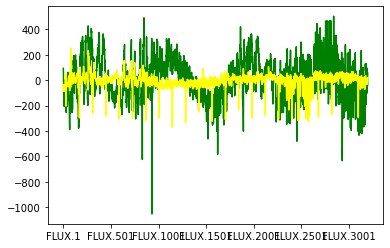

In [8]:


print("Standardized version of X train: " , X_train_standardize[0])

X_train.iloc[0].plot(kind='line', x='flux instance' , y ='change in flux' , color = 'green')
X_train.iloc[1].plot(kind='line', x='flux instance' , y ='change in flux' , color = 'yellow')

In [9]:

pca = PCA(n_components=13)
X_training_reduced = pca.fit_transform(X_train_standardize)
print("Reduced to ", pca.n_components_, " features")

X_testing_reduced = pca.fit_transform(X_test_standardize)

Reduced to  13  features


In [10]:
X_training_reduced_df = pd.DataFrame(data=X_training_reduced, 
                                     columns = ['principal component '+str(i) for i in range(1,pca.n_components_+1)])
X_training_reduced_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13
0,-0.877626,-0.207684,-0.377819,-0.039444,-0.049104,-0.303499,-0.144108,-0.012560,-0.115952,-0.110266,-0.048105,0.020416,-0.036627
1,-0.891087,-0.157275,-0.414121,-0.105086,-0.086087,-0.230774,-0.100156,0.077395,-0.088215,-0.130910,-0.037975,-0.074378,-0.057358
2,-0.982439,0.078053,-0.561659,-0.372453,-0.135209,-0.204867,-0.078795,0.214136,-0.003310,-0.124718,-0.032027,-0.022786,-0.073112
3,-0.919516,-0.135503,-0.441615,-0.183559,-0.109155,-0.219593,-0.098396,0.076506,-0.059351,-0.133337,-0.031117,-0.115664,-0.079823
4,-1.385796,-0.309362,-0.064631,0.475238,-0.033298,-0.453479,-0.274385,0.222627,-0.101000,-0.094631,0.099866,0.095727,-0.041619


In [11]:
X_testing_reduced_df = pd.DataFrame(data=X_testing_reduced, 
                                     columns = ['principal component '+str(i) for i in range(1,pca.n_components_+1)])
X_training_reduced_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13
0,-0.877626,-0.207684,-0.377819,-0.039444,-0.049104,-0.303499,-0.144108,-0.012560,-0.115952,-0.110266,-0.048105,0.020416,-0.036627
1,-0.891087,-0.157275,-0.414121,-0.105086,-0.086087,-0.230774,-0.100156,0.077395,-0.088215,-0.130910,-0.037975,-0.074378,-0.057358
2,-0.982439,0.078053,-0.561659,-0.372453,-0.135209,-0.204867,-0.078795,0.214136,-0.003310,-0.124718,-0.032027,-0.022786,-0.073112
3,-0.919516,-0.135503,-0.441615,-0.183559,-0.109155,-0.219593,-0.098396,0.076506,-0.059351,-0.133337,-0.031117,-0.115664,-0.079823
4,-1.385796,-0.309362,-0.064631,0.475238,-0.033298,-0.453479,-0.274385,0.222627,-0.101000,-0.094631,0.099866,0.095727,-0.041619


In [12]:
pca_two = PCA(n_components=13)
plotData = pca_two.fit_transform(X_train_standardize)
print("Data captured ", np.round(np.sum(pca_two.explained_variance_ratio_),5) * 100, "%")
print(np.round((1-np.sum(pca_two.explained_variance_ratio_)),5) * 100, "% information is lost.")

Data captured  97.33800000000001 %
2.662 % information is lost.


In [13]:
clf = knn.Knn()
clf.fit(X_training_reduced_df,y_train)

print(clf.data, clf.target)

principal component 1  principal component 2  principal component 3  \
0                 -0.877626              -0.207684              -0.377819   
1                 -0.891087              -0.157275              -0.414121   
2                 -0.982439               0.078053              -0.561659   
3                 -0.919516              -0.135503              -0.441615   
4                 -1.385796              -0.309362              -0.064631   
...                     ...                    ...                    ...   
5082              -0.868414              -0.175260              -0.305443   
5083              -0.811478              -0.030379              -0.409791   
5084              -0.888827              -0.114705              -0.428222   
5085              -0.879204              -0.103475              -0.396928   
5086              -0.880392              -0.098869              -0.405523   

      principal component 4  principal component 5  principal component 6  \
0   

In [14]:
trainingData = pd.concat([X_training_reduced_df, y_train], axis=1)
print('Data instance: ')
display(HTML(pd.DataFrame(trainingData.loc[20,:]).T.to_html()))

Data instance: 


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,LABEL
20,-0.884133,-0.18978,-0.211068,-0.019671,0.137629,-0.37191,-0.250015,-0.030631,-0.172501,-0.196661,-0.012617,-0.022959,-0.016257,2.0


In [15]:
instanceData = trainingData.loc[20,"principal component 1":"principal component 13"]
prediciton= clf.predict(instanceData)
print("True Class: ", trainingData.loc[20,"LABEL"])
# print("Predicited Class: ", prediciton)

True Class:  2


In [2]:
import knn # custom python file

# search for an optimal value of K for KNN

# list of integers 2 to 14
k_range = range(1, 15)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for kH in k_range:
    # 2. run my custom model with k neighbours
    clf = knn.Knn(k=kH)
    clf.fit(X_train,y_train)
    results = {}
    result = []

    score = clf.score(X_test,y_test) 
    print("K: ",kH," Score: ", score)
    print("---------------------------------------------------------------------------------------------------")

    # 3. append mean of scores for k neighbors to k_scores list
    k_scores.append(score)

ModuleNotFoundError: No module named 'knn'

In [1]:
print(k_scores)

NameError: name 'k_scores' is not defined

In [2]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('No Validation')

max_value = max(k_scores)  # maximum value
max_keys = np.where(k_scores == np.amax(k_scores))[0]+1 # getting all keys containing the `maximum`

plt.axhline(max_value, color='r', linestyle='--', linewidth=1);
[plt.axvline(_x, linewidth=1, color='r',linestyle='--') for _x in max_keys];
print("Best Score: %.4f" % max_value)
print("Best K: ", max_keys)

NameError: name 'plt' is not defined